# 1. Import and Install Dependencies

In [68]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install tensorflow==2.5.1 tensorflow-gpu==2.5.1 opencv-python mediapipe sklearn matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tensorflow-intel 2.12.0 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.19.5 which is incompatible.
tensorflow-intel 2.12.0 requires tensorboard<2.13,>=2.12, but you have tensorboard 2.11.2 which is incompatible.
tensorflow-intel 2.12.0 requires tensorflow-estimator<2.13,>=2.12.0, but you have tensorflow-estimator 2.5.0 which is incompatible.



  Using cached tensorflow-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached tensorflow_gpu-2.5.1-cp39-cp39-win_amd64.whl (422.7 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
  Using cached mediapipe-0.9.2.1-cp39-cp39-win_amd64.whl (50.1 MB)
  Using cached mediapipe-0.9.1.0-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.9.0.1-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.9.0-cp39-cp39-win_amd64.whl (49.8 MB)
  Using cached mediapipe-0.8.11-cp39-cp39-win_amd64.whl (49.0 MB)
INFO: pip is looking at multiple versions of tensorboard to determine which version is compatible with other requirements. This could ta

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

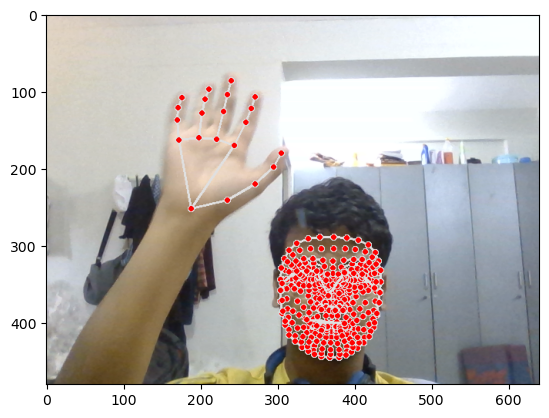

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.pose_landmarks.landmark)

33

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.57243365,  0.76125944, -0.93557274, ...,  0.27519381,
        0.22624154,  0.00199256])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.57243365,  0.76125944, -0.93557274, ...,  0.27519381,
        0.22624154,  0.00199256])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hi', 'my', 'name','is','something'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [44]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [45]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [46]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'hi': 0, 'my': 1, 'name': 2, 'is': 3, 'something': 4}

In [24]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [25]:
np.array(sequences).shape

(150, 30, 1662)

In [26]:
np.array(labels).shape

(150,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(150, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.07)

In [31]:
y_test.shape

(11, 5)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [129]:
model.fit(X_train, y_train, epochs=1750, callbacks=[tb_callback])

Epoch 1/1750
5/5 [==============================] - 3s 224ms/step - loss: 3.4976 - categorical_accuracy: 0.2086
Epoch 2/1750
5/5 [==============================] - 0s 68ms/step - loss: 2.1985 - categorical_accuracy: 0.1583
Epoch 3/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.7535 - categorical_accuracy: 0.1727
Epoch 4/1750
5/5 [==============================] - 0s 72ms/step - loss: 2.7347 - categorical_accuracy: 0.2158
Epoch 5/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.5284 - categorical_accuracy: 0.2590
Epoch 6/1750
5/5 [==============================] - 0s 75ms/step - loss: 1.3440 - categorical_accuracy: 0.4532
Epoch 7/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.3567 - categorical_accuracy: 0.4173
Epoch 8/1750
5/5 [==============================] - 0s 67ms/step - loss: 1.5164 - categorical_accuracy: 0.2374
Epoch 9/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.3225 - categorical_accuracy: 0.4245


5/5 [==============================] - 0s 71ms/step - loss: 0.2633 - categorical_accuracy: 0.9065
Epoch 75/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.2039 - categorical_accuracy: 0.9424
Epoch 76/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.1583 - categorical_accuracy: 0.9640
Epoch 77/1750
5/5 [==============================] - 0s 66ms/step - loss: 1.1368 - categorical_accuracy: 0.7194
Epoch 78/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.4693 - categorical_accuracy: 0.3741
Epoch 79/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.1284 - categorical_accuracy: 0.5468
Epoch 80/1750
5/5 [==============================] - 0s 73ms/step - loss: 1.0525 - categorical_accuracy: 0.5683
Epoch 81/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.9610 - categorical_accuracy: 0.5899
Epoch 82/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.9139 - categorical_accuracy: 0.5252
Epoch 

5/5 [==============================] - 0s 69ms/step - loss: 2.0323 - categorical_accuracy: 0.2878
Epoch 147/1750
5/5 [==============================] - 0s 67ms/step - loss: 1.7784 - categorical_accuracy: 0.2086
Epoch 148/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.7256 - categorical_accuracy: 0.2086
Epoch 149/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.6920 - categorical_accuracy: 0.2158
Epoch 150/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.7664 - categorical_accuracy: 0.2086
Epoch 151/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.6502 - categorical_accuracy: 0.2086
Epoch 152/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.6401 - categorical_accuracy: 0.2158
Epoch 153/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.6313 - categorical_accuracy: 0.2086
Epoch 154/1750
5/5 [==============================] - 0s 73ms/step - loss: 1.6274 - categorical_accuracy: 0.208

5/5 [==============================] - 0s 73ms/step - loss: 1.5826 - categorical_accuracy: 0.2158
Epoch 219/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.5822 - categorical_accuracy: 0.2158
Epoch 220/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.5813 - categorical_accuracy: 0.2158
Epoch 221/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.5811 - categorical_accuracy: 0.2158
Epoch 222/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.5802 - categorical_accuracy: 0.2158
Epoch 223/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.6278 - categorical_accuracy: 0.1439
Epoch 224/1750
5/5 [==============================] - 0s 66ms/step - loss: 1.5868 - categorical_accuracy: 0.2158
Epoch 225/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.5898 - categorical_accuracy: 0.1871
Epoch 226/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.5909 - categorical_accuracy: 0.215

5/5 [==============================] - 0s 70ms/step - loss: 48.5851 - categorical_accuracy: 0.2590
Epoch 291/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.6225 - categorical_accuracy: 0.2086
Epoch 292/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.6175 - categorical_accuracy: 0.2230
Epoch 293/1750
5/5 [==============================] - 0s 73ms/step - loss: 1.6124 - categorical_accuracy: 0.2014
Epoch 294/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.5810 - categorical_accuracy: 0.2014
Epoch 295/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.5297 - categorical_accuracy: 0.2014
Epoch 296/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.4861 - categorical_accuracy: 0.2374
Epoch 297/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.4414 - categorical_accuracy: 0.3957
Epoch 298/1750
5/5 [==============================] - 0s 65ms/step - loss: 1.2689 - categorical_accuracy: 0.38

5/5 [==============================] - 0s 68ms/step - loss: 0.7213 - categorical_accuracy: 0.6259
Epoch 363/1750
5/5 [==============================] - 0s 73ms/step - loss: 0.7089 - categorical_accuracy: 0.5899
Epoch 364/1750
5/5 [==============================] - 0s 75ms/step - loss: 0.8684 - categorical_accuracy: 0.6403
Epoch 365/1750
5/5 [==============================] - 0s 74ms/step - loss: 0.7212 - categorical_accuracy: 0.5755
Epoch 366/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.6862 - categorical_accuracy: 0.7194
Epoch 367/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.7669 - categorical_accuracy: 0.7338
Epoch 368/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.7266 - categorical_accuracy: 0.5899
Epoch 369/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.6936 - categorical_accuracy: 0.7194
Epoch 370/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.6576 - categorical_accuracy: 0.676

5/5 [==============================] - 0s 73ms/step - loss: 0.1910 - categorical_accuracy: 0.9353
Epoch 435/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.1668 - categorical_accuracy: 0.9568
Epoch 436/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.2301 - categorical_accuracy: 0.9353
Epoch 437/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.1992 - categorical_accuracy: 0.9137
Epoch 438/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.1405 - categorical_accuracy: 0.9424
Epoch 439/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.1547 - categorical_accuracy: 0.9424
Epoch 440/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.1071 - categorical_accuracy: 0.9640
Epoch 441/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.1438 - categorical_accuracy: 0.9496
Epoch 442/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.1150 - categorical_accuracy: 0.956

5/5 [==============================] - 0s 71ms/step - loss: 0.0726 - categorical_accuracy: 0.9856
Epoch 507/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.1384 - categorical_accuracy: 0.9496
Epoch 508/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.2133 - categorical_accuracy: 0.8993
Epoch 509/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.1604 - categorical_accuracy: 0.9424
Epoch 510/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.2859 - categorical_accuracy: 0.9209
Epoch 511/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.2009 - categorical_accuracy: 0.9281
Epoch 512/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.2299 - categorical_accuracy: 0.9281
Epoch 513/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.1203 - categorical_accuracy: 0.9568
Epoch 514/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.2233 - categorical_accuracy: 0.899

5/5 [==============================] - 0s 75ms/step - loss: 0.0298 - categorical_accuracy: 0.9928
Epoch 579/1750
5/5 [==============================] - 0s 75ms/step - loss: 0.0279 - categorical_accuracy: 0.9856
Epoch 580/1750
5/5 [==============================] - 0s 82ms/step - loss: 0.3082 - categorical_accuracy: 0.9281
Epoch 581/1750
5/5 [==============================] - 0s 87ms/step - loss: 0.1263 - categorical_accuracy: 0.9640
Epoch 582/1750
5/5 [==============================] - 0s 78ms/step - loss: 0.0959 - categorical_accuracy: 0.9712
Epoch 583/1750
5/5 [==============================] - 0s 77ms/step - loss: 0.0430 - categorical_accuracy: 0.9856
Epoch 584/1750
5/5 [==============================] - 0s 77ms/step - loss: 0.0679 - categorical_accuracy: 0.9784
Epoch 585/1750
5/5 [==============================] - 0s 84ms/step - loss: 0.2582 - categorical_accuracy: 0.9209
Epoch 586/1750
5/5 [==============================] - 0s 79ms/step - loss: 0.1629 - categorical_accuracy: 0.949

5/5 [==============================] - 0s 73ms/step - loss: 0.0173 - categorical_accuracy: 0.9928
Epoch 651/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.0168 - categorical_accuracy: 0.9928
Epoch 652/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.0166 - categorical_accuracy: 0.9928
Epoch 653/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.0163 - categorical_accuracy: 0.9928
Epoch 654/1750
5/5 [==============================] - 0s 66ms/step - loss: 0.0161 - categorical_accuracy: 0.9928
Epoch 655/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.0160 - categorical_accuracy: 0.9928
Epoch 656/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0161 - categorical_accuracy: 0.9928
Epoch 657/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.0154 - categorical_accuracy: 0.9928
Epoch 658/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.0153 - categorical_accuracy: 0.992

5/5 [==============================] - 0s 69ms/step - loss: 0.0092 - categorical_accuracy: 0.9928
Epoch 723/1750
5/5 [==============================] - 0s 73ms/step - loss: 0.0092 - categorical_accuracy: 0.9928
Epoch 724/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0092 - categorical_accuracy: 0.9928
Epoch 725/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.0092 - categorical_accuracy: 0.9928
Epoch 726/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.0091 - categorical_accuracy: 0.9928
Epoch 727/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.0091 - categorical_accuracy: 0.9928
Epoch 728/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.0091 - categorical_accuracy: 0.9928
Epoch 729/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.0091 - categorical_accuracy: 0.9928
Epoch 730/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.0090 - categorical_accuracy: 0.992

5/5 [==============================] - 0s 69ms/step - loss: 0.0081 - categorical_accuracy: 0.9928
Epoch 795/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 796/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 797/1750
5/5 [==============================] - 0s 78ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 798/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 799/1750
5/5 [==============================] - 0s 70ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 800/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 801/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.0080 - categorical_accuracy: 0.9928
Epoch 802/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0080 - categorical_accuracy: 0.992

5/5 [==============================] - 0s 71ms/step - loss: 0.0070 - categorical_accuracy: 0.9928
Epoch 867/1750
5/5 [==============================] - 0s 70ms/step - loss: 5.3688 - categorical_accuracy: 0.7482
Epoch 868/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.7961 - categorical_accuracy: 0.4748
Epoch 869/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.0870 - categorical_accuracy: 0.7698
Epoch 870/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.9903 - categorical_accuracy: 0.3957
Epoch 871/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.4233 - categorical_accuracy: 0.3525
Epoch 872/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.6581 - categorical_accuracy: 0.2374
Epoch 873/1750
5/5 [==============================] - 0s 67ms/step - loss: 1.4833 - categorical_accuracy: 0.3597
Epoch 874/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.4346 - categorical_accuracy: 0.402

5/5 [==============================] - 0s 71ms/step - loss: 0.0345 - categorical_accuracy: 0.9928
Epoch 939/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.0359 - categorical_accuracy: 0.9928
Epoch 940/1750
5/5 [==============================] - 0s 71ms/step - loss: 0.0958 - categorical_accuracy: 0.9712
Epoch 941/1750
5/5 [==============================] - 0s 74ms/step - loss: 1.1208 - categorical_accuracy: 0.7410
Epoch 942/1750
5/5 [==============================] - 0s 67ms/step - loss: 0.5038 - categorical_accuracy: 0.7770
Epoch 943/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.0960 - categorical_accuracy: 0.5324
Epoch 944/1750
5/5 [==============================] - 0s 72ms/step - loss: 0.5774 - categorical_accuracy: 0.7338
Epoch 945/1750
5/5 [==============================] - 0s 68ms/step - loss: 0.3928 - categorical_accuracy: 0.8921
Epoch 946/1750
5/5 [==============================] - 0s 69ms/step - loss: 0.5141 - categorical_accuracy: 0.755

5/5 [==============================] - 0s 69ms/step - loss: 8.4372e-04 - categorical_accuracy: 1.0000
Epoch 1011/1750
5/5 [==============================] - 0s 68ms/step - loss: 8.0035e-04 - categorical_accuracy: 1.0000
Epoch 1012/1750
5/5 [==============================] - 0s 69ms/step - loss: 7.6569e-04 - categorical_accuracy: 1.0000
Epoch 1013/1750
5/5 [==============================] - 0s 70ms/step - loss: 7.7685e-04 - categorical_accuracy: 1.0000
Epoch 1014/1750
5/5 [==============================] - 0s 69ms/step - loss: 7.2029e-04 - categorical_accuracy: 1.0000
Epoch 1015/1750
5/5 [==============================] - 0s 72ms/step - loss: 6.7241e-04 - categorical_accuracy: 1.0000
Epoch 1016/1750
5/5 [==============================] - 0s 67ms/step - loss: 6.7314e-04 - categorical_accuracy: 1.0000
Epoch 1017/1750
5/5 [==============================] - 0s 65ms/step - loss: 6.4555e-04 - categorical_accuracy: 1.0000
Epoch 1018/1750
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 68ms/step - loss: 1.5153e-04 - categorical_accuracy: 1.0000
Epoch 1080/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.4914e-04 - categorical_accuracy: 1.0000
Epoch 1081/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.4708e-04 - categorical_accuracy: 1.0000
Epoch 1082/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.4494e-04 - categorical_accuracy: 1.0000
Epoch 1083/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.4241e-04 - categorical_accuracy: 1.0000
Epoch 1084/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.4072e-04 - categorical_accuracy: 1.0000
Epoch 1085/1750
5/5 [==============================] - 0s 69ms/step - loss: 1.3881e-04 - categorical_accuracy: 1.0000
Epoch 1086/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.3719e-04 - categorical_accuracy: 1.0000
Epoch 1087/1750
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 68ms/step - loss: 6.3036e-05 - categorical_accuracy: 1.0000
Epoch 1149/1750
5/5 [==============================] - 0s 70ms/step - loss: 6.2285e-05 - categorical_accuracy: 1.0000
Epoch 1150/1750
5/5 [==============================] - 0s 66ms/step - loss: 6.1665e-05 - categorical_accuracy: 1.0000
Epoch 1151/1750
5/5 [==============================] - 0s 69ms/step - loss: 6.1068e-05 - categorical_accuracy: 1.0000
Epoch 1152/1750
5/5 [==============================] - 0s 72ms/step - loss: 6.0536e-05 - categorical_accuracy: 1.0000
Epoch 1153/1750
5/5 [==============================] - 0s 71ms/step - loss: 5.9868e-05 - categorical_accuracy: 1.0000
Epoch 1154/1750
5/5 [==============================] - 0s 68ms/step - loss: 5.9062e-05 - categorical_accuracy: 1.0000
Epoch 1155/1750
5/5 [==============================] - 0s 68ms/step - loss: 5.8374e-05 - categorical_accuracy: 1.0000
Epoch 1156/1750
5/5 [==============================] - 0s 68ms/step - lo

5/5 [==============================] - 0s 70ms/step - loss: 3.3826e-05 - categorical_accuracy: 1.0000
Epoch 1218/1750
5/5 [==============================] - 0s 68ms/step - loss: 3.3552e-05 - categorical_accuracy: 1.0000
Epoch 1219/1750
5/5 [==============================] - 0s 67ms/step - loss: 3.3499e-05 - categorical_accuracy: 1.0000
Epoch 1220/1750
5/5 [==============================] - 0s 72ms/step - loss: 3.3117e-05 - categorical_accuracy: 1.0000
Epoch 1221/1750
5/5 [==============================] - 0s 70ms/step - loss: 3.3057e-05 - categorical_accuracy: 1.0000
Epoch 1222/1750
5/5 [==============================] - 0s 69ms/step - loss: 3.2527e-05 - categorical_accuracy: 1.0000
Epoch 1223/1750
5/5 [==============================] - 0s 68ms/step - loss: 3.2293e-05 - categorical_accuracy: 1.0000
Epoch 1224/1750
5/5 [==============================] - 0s 69ms/step - loss: 3.2000e-05 - categorical_accuracy: 1.0000
Epoch 1225/1750
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 74ms/step - loss: 2.0667e-05 - categorical_accuracy: 1.0000
Epoch 1287/1750
5/5 [==============================] - 0s 69ms/step - loss: 2.0534e-05 - categorical_accuracy: 1.0000
Epoch 1288/1750
5/5 [==============================] - 0s 69ms/step - loss: 2.0395e-05 - categorical_accuracy: 1.0000
Epoch 1289/1750
5/5 [==============================] - 0s 69ms/step - loss: 2.0246e-05 - categorical_accuracy: 1.0000
Epoch 1290/1750
5/5 [==============================] - 0s 68ms/step - loss: 2.0148e-05 - categorical_accuracy: 1.0000
Epoch 1291/1750
5/5 [==============================] - 0s 70ms/step - loss: 2.0033e-05 - categorical_accuracy: 1.0000
Epoch 1292/1750
5/5 [==============================] - 0s 72ms/step - loss: 1.9882e-05 - categorical_accuracy: 1.0000
Epoch 1293/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.9758e-05 - categorical_accuracy: 1.0000
Epoch 1294/1750
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 70ms/step - loss: 1.3653e-05 - categorical_accuracy: 1.0000
Epoch 1356/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.3581e-05 - categorical_accuracy: 1.0000
Epoch 1357/1750
5/5 [==============================] - 0s 68ms/step - loss: 1.3497e-05 - categorical_accuracy: 1.0000
Epoch 1358/1750
5/5 [==============================] - 0s 73ms/step - loss: 1.3424e-05 - categorical_accuracy: 1.0000
Epoch 1359/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.3352e-05 - categorical_accuracy: 1.0000
Epoch 1360/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.3284e-05 - categorical_accuracy: 1.0000
Epoch 1361/1750
5/5 [==============================] - 0s 70ms/step - loss: 1.3208e-05 - categorical_accuracy: 1.0000
Epoch 1362/1750
5/5 [==============================] - 0s 71ms/step - loss: 1.3131e-05 - categorical_accuracy: 1.0000
Epoch 1363/1750
5/5 [==============================] - 0s 66ms/step - lo

5/5 [==============================] - 0s 68ms/step - loss: 9.3769e-06 - categorical_accuracy: 1.0000
Epoch 1425/1750
5/5 [==============================] - 0s 67ms/step - loss: 9.3211e-06 - categorical_accuracy: 1.0000
Epoch 1426/1750
5/5 [==============================] - 0s 67ms/step - loss: 9.2594e-06 - categorical_accuracy: 1.0000
Epoch 1427/1750
5/5 [==============================] - 0s 66ms/step - loss: 9.2182e-06 - categorical_accuracy: 1.0000
Epoch 1428/1750
5/5 [==============================] - 0s 69ms/step - loss: 9.1942e-06 - categorical_accuracy: 1.0000
Epoch 1429/1750
5/5 [==============================] - 0s 74ms/step - loss: 9.1265e-06 - categorical_accuracy: 1.0000
Epoch 1430/1750
5/5 [==============================] - 0s 70ms/step - loss: 9.0965e-06 - categorical_accuracy: 1.0000
Epoch 1431/1750
5/5 [==============================] - 0s 70ms/step - loss: 9.0339e-06 - categorical_accuracy: 1.0000
Epoch 1432/1750
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 66ms/step - loss: 6.5992e-06 - categorical_accuracy: 1.0000
Epoch 1494/1750
5/5 [==============================] - 0s 68ms/step - loss: 6.5735e-06 - categorical_accuracy: 1.0000
Epoch 1495/1750
5/5 [==============================] - 0s 69ms/step - loss: 6.5486e-06 - categorical_accuracy: 1.0000
Epoch 1496/1750
5/5 [==============================] - 0s 68ms/step - loss: 6.5049e-06 - categorical_accuracy: 1.0000
Epoch 1497/1750
5/5 [==============================] - 0s 68ms/step - loss: 6.4646e-06 - categorical_accuracy: 1.0000
Epoch 1498/1750
5/5 [==============================] - 0s 70ms/step - loss: 6.4269e-06 - categorical_accuracy: 1.0000
Epoch 1499/1750
5/5 [==============================] - 0s 72ms/step - loss: 6.4123e-06 - categorical_accuracy: 1.0000
Epoch 1500/1750
5/5 [==============================] - 0s 74ms/step - loss: 6.3720e-06 - categorical_accuracy: 1.0000
Epoch 1501/1750
5/5 [==============================] - 0s 71ms/step - lo

5/5 [==============================] - 0s 74ms/step - loss: 4.7897e-06 - categorical_accuracy: 1.0000
Epoch 1563/1750
5/5 [==============================] - 0s 68ms/step - loss: 4.7614e-06 - categorical_accuracy: 1.0000
Epoch 1564/1750
5/5 [==============================] - 0s 66ms/step - loss: 4.7366e-06 - categorical_accuracy: 1.0000
Epoch 1565/1750
5/5 [==============================] - 0s 68ms/step - loss: 4.7151e-06 - categorical_accuracy: 1.0000
Epoch 1566/1750
5/5 [==============================] - 0s 71ms/step - loss: 4.6911e-06 - categorical_accuracy: 1.0000
Epoch 1567/1750
5/5 [==============================] - 0s 68ms/step - loss: 4.6739e-06 - categorical_accuracy: 1.0000
Epoch 1568/1750
5/5 [==============================] - 0s 70ms/step - loss: 4.6499e-06 - categorical_accuracy: 1.0000
Epoch 1569/1750
5/5 [==============================] - 0s 71ms/step - loss: 4.6311e-06 - categorical_accuracy: 1.0000
Epoch 1570/1750
5/5 [==============================] - 0s 69ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 3.5368e-06 - categorical_accuracy: 1.0000
Epoch 1632/1750
5/5 [==============================] - 0s 69ms/step - loss: 3.5033e-06 - categorical_accuracy: 1.0000
Epoch 1633/1750
5/5 [==============================] - 0s 67ms/step - loss: 3.4819e-06 - categorical_accuracy: 1.0000
Epoch 1634/1750
5/5 [==============================] - 0s 68ms/step - loss: 3.4785e-06 - categorical_accuracy: 1.0000
Epoch 1635/1750
5/5 [==============================] - 0s 70ms/step - loss: 3.4587e-06 - categorical_accuracy: 1.0000
Epoch 1636/1750
5/5 [==============================] - 0s 72ms/step - loss: 3.4347e-06 - categorical_accuracy: 1.0000
Epoch 1637/1750
5/5 [==============================] - 0s 75ms/step - loss: 3.4193e-06 - categorical_accuracy: 1.0000
Epoch 1638/1750
5/5 [==============================] - 0s 84ms/step - loss: 3.4039e-06 - categorical_accuracy: 1.0000
Epoch 1639/1750
5/5 [==============================] - 0s 79ms/step - lo

5/5 [==============================] - 0s 69ms/step - loss: 2.5806e-06 - categorical_accuracy: 1.0000
Epoch 1701/1750
5/5 [==============================] - 0s 72ms/step - loss: 2.5694e-06 - categorical_accuracy: 1.0000
Epoch 1702/1750
5/5 [==============================] - 0s 69ms/step - loss: 2.5643e-06 - categorical_accuracy: 1.0000
Epoch 1703/1750
5/5 [==============================] - 0s 71ms/step - loss: 2.5471e-06 - categorical_accuracy: 1.0000
Epoch 1704/1750
5/5 [==============================] - 0s 67ms/step - loss: 2.5368e-06 - categorical_accuracy: 1.0000
Epoch 1705/1750
5/5 [==============================] - 0s 67ms/step - loss: 2.5274e-06 - categorical_accuracy: 1.0000
Epoch 1706/1750
5/5 [==============================] - 0s 69ms/step - loss: 2.5119e-06 - categorical_accuracy: 1.0000
Epoch 1707/1750
5/5 [==============================] - 0s 71ms/step - loss: 2.5034e-06 - categorical_accuracy: 1.0000
Epoch 1708/1750
5/5 [==============================] - 0s 69ms/step - lo

In [130]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [36]:
res = model.predict(X_test)

In [37]:
actions[np.argmax(res[4])]

'name'

In [38]:
actions[np.argmax(y_test[4])]

'something'

# 9. Save Weights

In [39]:
model.save('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [41]:
model.load_weights('action.h5')

In [42]:
yhat = model.predict(X_test)

In [43]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 6,  0],
        [ 5,  0]],

       [[ 5,  5],
        [ 1,  0]],

       [[ 5,  5],
        [ 0,  1]],

       [[10,  0],
        [ 1,  0]],

       [[ 8,  0],
        [ 3,  0]]], dtype=int64)

In [45]:
accuracy_score(ytrue, yhat)

0.09090909090909091

# 11. Test in Real Time

In [46]:
import os
from matplotlib import pyplot as plt
from scipy import stats

In [47]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1000x1000 with 0 Axes>

In [151]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range